# Code for Bachelor Thesis in Economics at Heidelberg University
## by Daniel Schäffer

## Imports:

In [1]:
# #standard modules
# import pandas as pd
# import numpy as np
# import os
# import re
# #plots:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# import cartopy
# import cartopy.feature as cf
# import cartopy.crs as ccrs
# import seaborn as sns
# import folium
# from folium.plugins import HeatMap, HeatMapWithTime
# #data
# from netCDF4 import Dataset
# from pandas import datetime
# #IO
# import openpyxl
# #speedup
# from numba import jit
# #animations
# from celluloid import Camera # getting the camera
# from IPython.display import HTML # to show the animation in Jupyter

from functions import plot_merra_data, plot_grid, plot_barchart3d, one_dim_lat_lon_array
# from functions import plot_main_dust
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
mpl.font_manager._rebuild()
# Use Open Sans font family for all text.
plt.rc('font', family='Open Sans')
plt.rcParams['figure.dpi'] = 150

In [3]:
parent_directory = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), os.pardir))

# 3. Empirical Strategy

## 3.1 Physical Model

### Data

In [4]:
simulated_dustmass_hourly_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_data.npy')
simulated_dustmass_hourly_novapr_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_novapr_data.npy')
simulated_dustmass_hourly_junsep_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_junsep_data.npy')
dust_t0_array = np.load(parent_directory + '\\processed_data\\dust_t0_array.npy')

In [5]:
west_africa_longitudes = np.load(parent_directory + '\\processed_data\\west_africa_longitudes.npy')
west_africa_latitudes = np.load(parent_directory + '\\processed_data\\west_africa_latitudes.npy')
west_africa_lat1d, west_africa_lon1d = one_dim_lat_lon_array(west_africa_latitudes, west_africa_longitudes, 1)

In [12]:
simulated_dustmass_hourly_data.shape

(324360, 91, 105)

In [20]:
from functions import distance2

print(distance2(41,40, 40, 40))

111.19492664454764


In [14]:
test.shape

(324360, 91, 105)

In [13]:
test = np.load(parent_directory + '\\processed_data\\dust_hourly_data.npy')


In [11]:
west_africa_longitudes

array([-3.00000000e+01, -2.93750000e+01, -2.87500000e+01, -2.81250000e+01,
       -2.75000000e+01, -2.68750000e+01, -2.62500000e+01, -2.56250000e+01,
       -2.50000000e+01, -2.43750000e+01, -2.37500000e+01, -2.31250000e+01,
       -2.25000000e+01, -2.18750000e+01, -2.12500000e+01, -2.06250000e+01,
       -2.00000000e+01, -1.93750000e+01, -1.87500000e+01, -1.81250000e+01,
       -1.75000000e+01, -1.68750000e+01, -1.62500000e+01, -1.56250000e+01,
       -1.50000000e+01, -1.43750000e+01, -1.37500000e+01, -1.31250000e+01,
       -1.25000000e+01, -1.18750000e+01, -1.12500000e+01, -1.06250000e+01,
       -1.00000000e+01, -9.37500000e+00, -8.75000000e+00, -8.12500000e+00,
       -7.50000000e+00, -6.87500000e+00, -6.25000000e+00, -5.62500000e+00,
       -5.00000000e+00, -4.37500000e+00, -3.75000000e+00, -3.12500000e+00,
       -2.50000000e+00, -1.87500000e+00, -1.25000000e+00, -6.25000000e-01,
       -5.92030439e-13,  6.25000000e-01,  1.25000000e+00,  1.87500000e+00,
        2.50000000e+00,  

### Plots

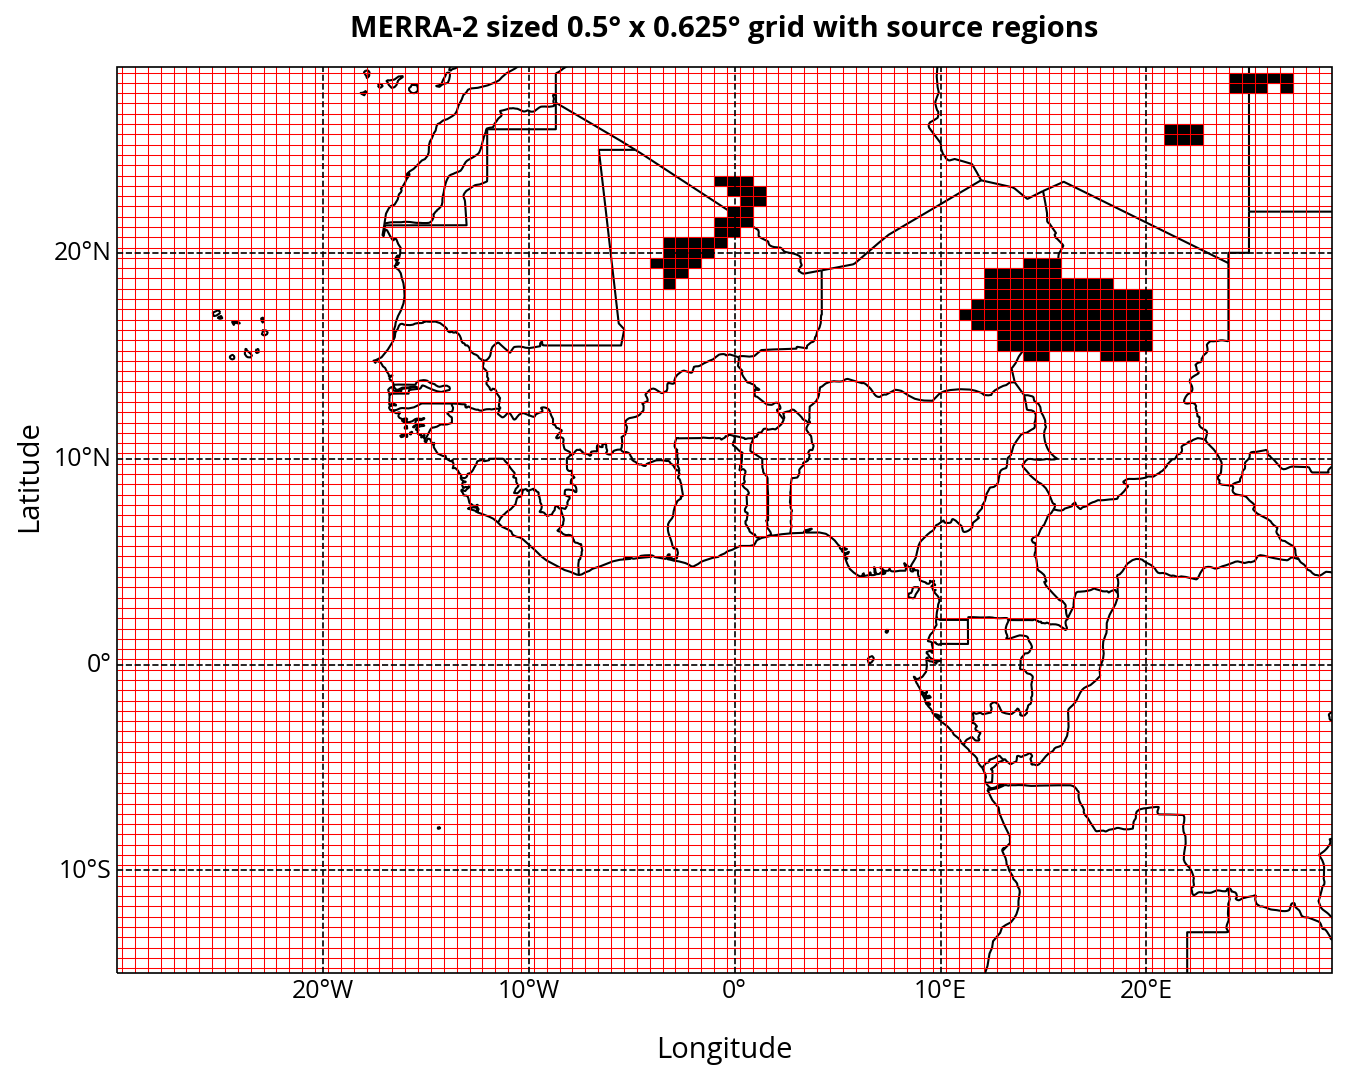

In [6]:
plot_grid(west_africa_latitudes, west_africa_longitudes,
          'MERRA-2 sized 0.5° x 0.625° grid with source regions',
          extent=[-30,29,-15,29], borders = True,
          add_source_region = True)

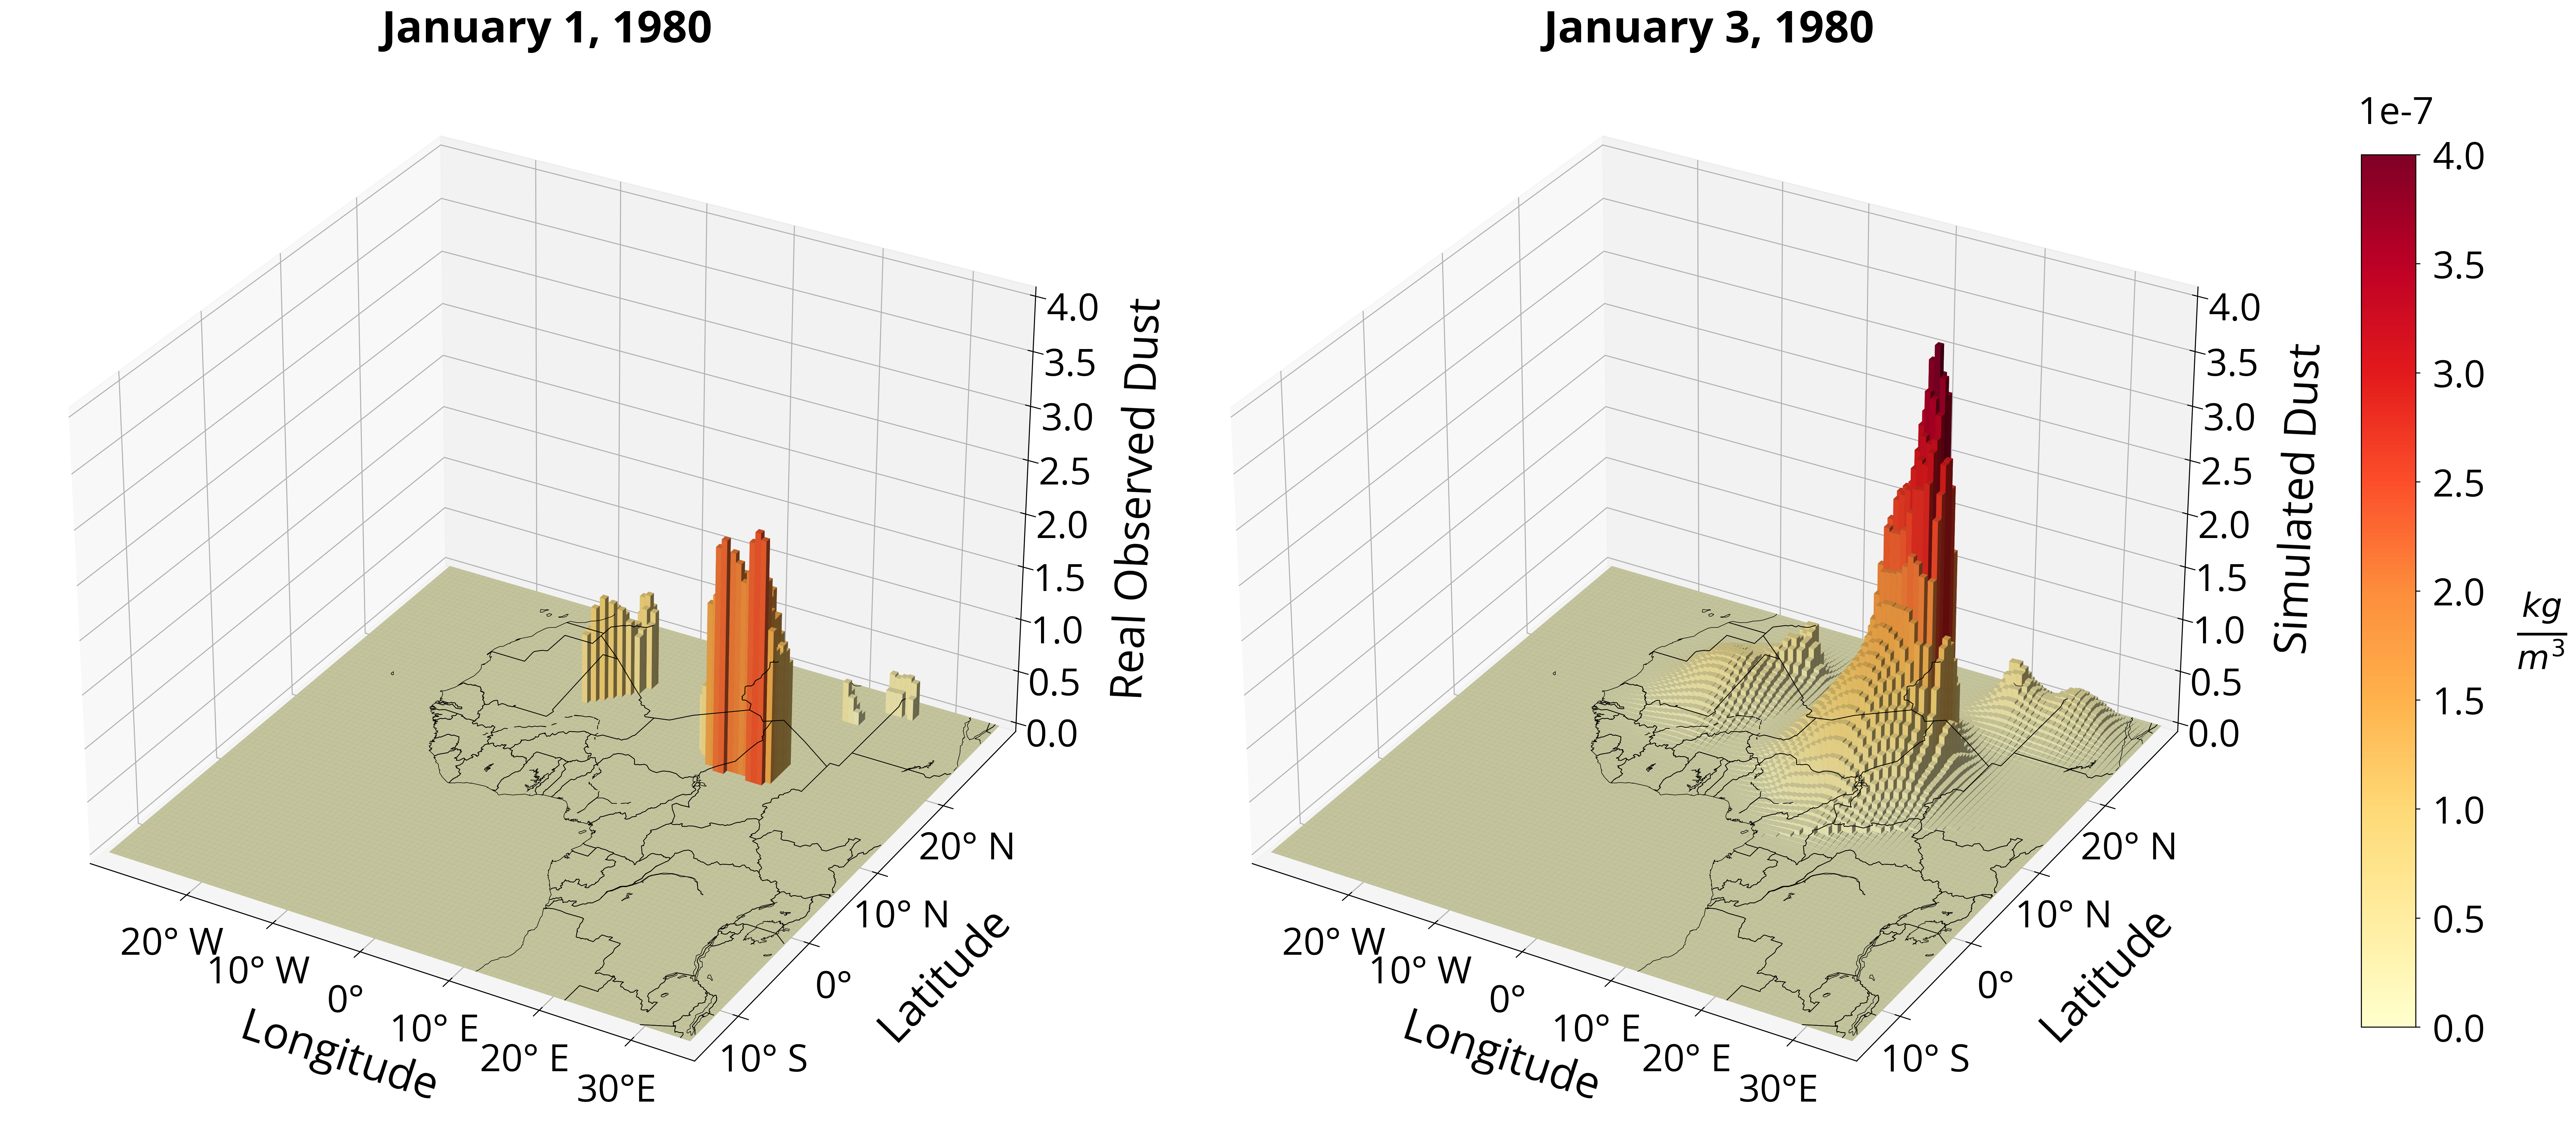

In [7]:
plot_barchart3d(dust_t0_array*10**7,simulated_dustmass_hourly_data[47]*10**7,lons_onedim = west_africa_lon1d, lats_onedim = west_africa_lat1d, title_1 = 'January 1, 1980', title_2 = 'January 3, 1980', Opacity = 1, title_size=35, value_size=30, xpad = 10, ypad= 10, zpad=10)

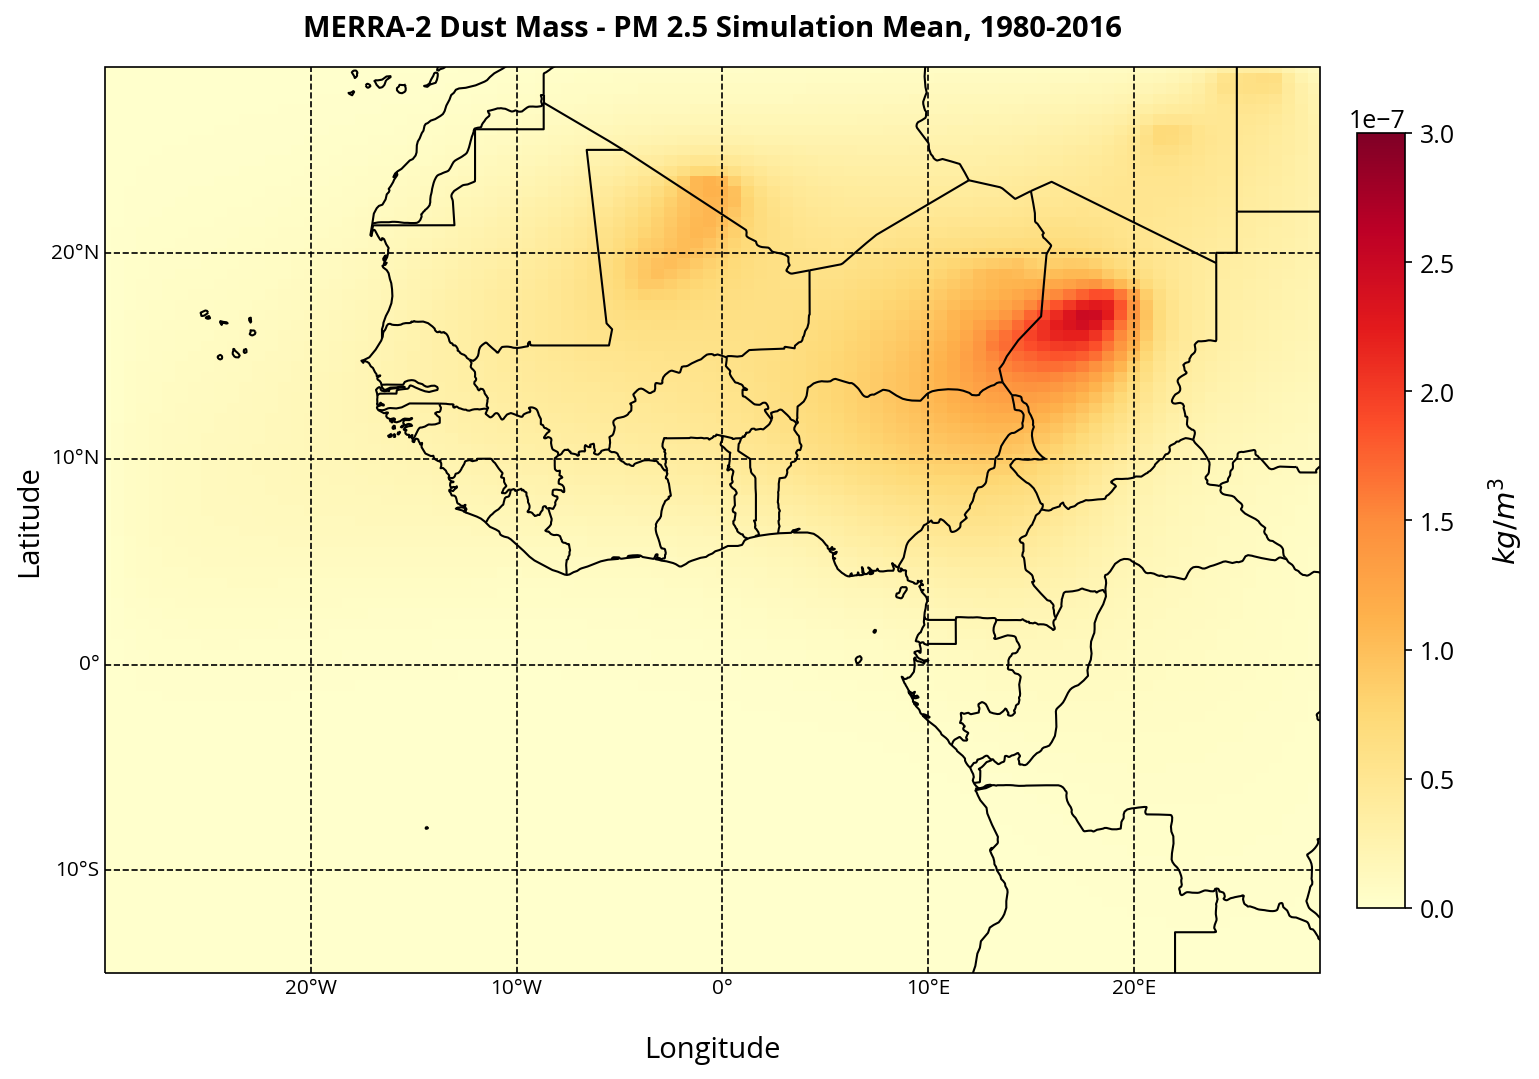

In [48]:
plot_merra_data(np.sum(simulated_dustmass_hourly_data, axis = 0)/simulated_dustmass_hourly_data.shape[0],
                west_africa_longitudes, west_africa_latitudes, title='MERRA-2 Dust Mass - PM 2.5 Simulation Mean, ',
                date='1980-2016', data_value=r'$kg/m^3$', extent=[-30,29,-15,29], borders = True,
                bodele = False, plot_grids = True, cbar_max = 3, unit = 10 ** -7,shrink=.855)

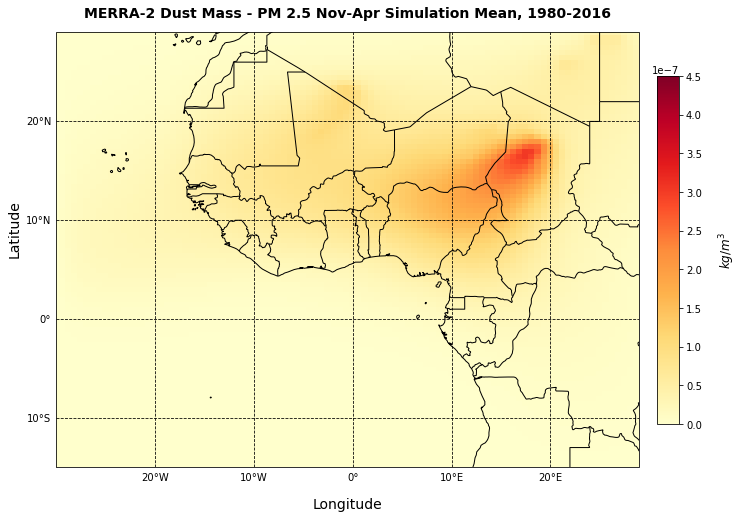

In [ ]:
plot_merra_data(np.sum(simulated_dustmass_hourly_novapr_data, axis = 0)/simulated_dustmass_hourly_novapr_data.shape[0],
                west_africa_longitudes, west_africa_latitudes, title='MERRA-2 Dust Mass - PM 2.5 Nov-Apr Simulation Mean, ',
                date='1980-2016', data_value=r'$kg/m^3$', extent=[-30,29,-15,29], borders = True,
                bodele = False, plot_grids = True, cbar_max = 4.5, unit = 10 ** -7)

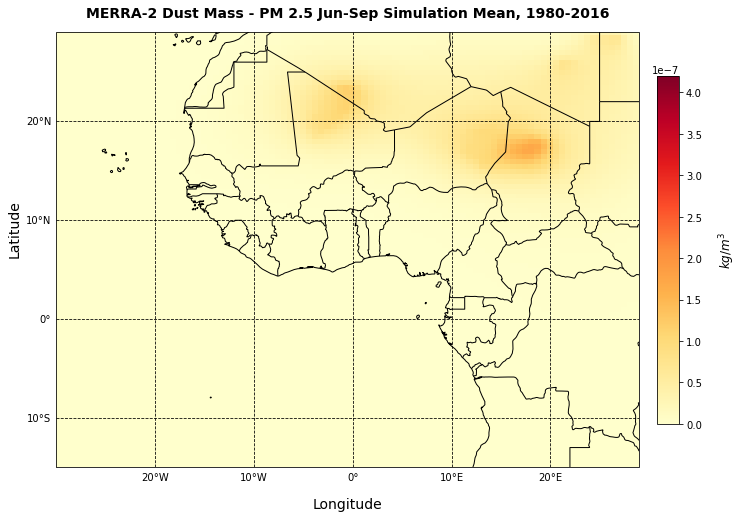

In [ ]:
plot_merra_data(np.sum(simulated_dustmass_hourly_junsep_data, axis = 0)/simulated_dustmass_hourly_junsep_data.shape[0],
                west_africa_longitudes, west_africa_latitudes, title='MERRA-2 Dust Mass - PM 2.5 Jun-Sep Simulation Mean, ',
                date='1980-2016', data_value=r'$kg/m^3$', extent=[-30,29,-15,29], borders = True,
                bodele = False, plot_grids = True, cbar_max = 4.2, unit = 10 ** -7)